# Logistic Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./Datasets/exp_2.csv")

In [3]:
df.shape

(400, 3)

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [6]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [9]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [11]:
scaling_step = ('scaler',StandardScaler(),[0,1])
transformers = ColumnTransformer(
    transformers = [scaling_step],
    remainder = 'passthrough'
)
model = LogisticRegression()
pipe = Pipeline([
    ('step1',transformers),
    ('step2',model)
])

In [12]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [0, 1])])),
                ('step2', LogisticRegression())])

In [13]:
print(f"Train Score: {round(pipe.score(x_train,y_train)*100,2)}")
print(f"Test Score:{round(pipe.score(x_test,y_test)*100,2)}")

Train Score: 84.38
Test Score:85.0


In [14]:
y_pred = pipe.predict(x_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

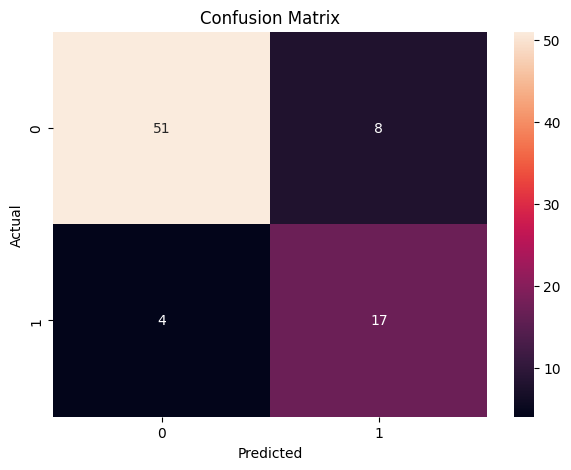

In [16]:
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        59
           1       0.68      0.81      0.74        21

    accuracy                           0.85        80
   macro avg       0.80      0.84      0.82        80
weighted avg       0.86      0.85      0.85        80

